In [40]:
import thermofun as fun #thermo. properties at T-P-X
import reaktoro as rkt # Gibbs free energy minimization
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

# local
from source.equilibration import ConstrainedEquilibration

In [110]:
# create base dataset from mines19 data file
database = fun.Database("../data/raw/thermodynamic_data/mines19-thermofun.json");

# add critical parameters for gases (missing in ThermoFun data files)
database.appendData("../data/raw/thermodynamic_data/slop98-gases-crit-thermofun.json");

# add Co aqueous species
database.appendData("../data/raw/thermodynamic_data/Co_aq_species_thermo.json");
database.appendData("../data/raw/thermodynamic_data/Co-S_aq_species_thermo_Migdisov_etal_2011_OptimC.json");
# database.appendData("../data/raw/thermodynamic_data/Co-Cl_aq_species_thermo_Liu_etal_2011.json");
database.appendData("../data/raw/thermodynamic_data/Co-Cl_aq_species_thermo_Migdisov_etal_2011_OptimC.json");

# add Co minerals 
database.appendData("../data/raw/thermodynamic_data/Co_mineral_thermo.json");

db = rkt.ThermoFunDatabase(database)

The element with symbol H is already in the database. Overwritting ...
To add it to the database as a separate record assign it a different symbol.
The element with symbol C is already in the database. Overwritting ...
To add it to the database as a separate record assign it a different symbol.
The element with symbol O is already in the database. Overwritting ...
To add it to the database as a separate record assign it a different symbol.
The element with symbol S is already in the database. Overwritting ...
To add it to the database as a separate record assign it a different symbol.
The substance with symbol H2O(g) is already in the database. Overwritting ...
To add it to the database as a separate record assign it a different symbol.
The substance with symbol CH4(g) is already in the database. Overwritting ...
To add it to the database as a separate record assign it a different symbol.
The substance with symbol CO2(g) is already in the database. Overwritting ...
To add it to the dat

In [138]:
elements = ["Cu", "Co", "Fe"]
candidate_minerals = []
for specie in db.species(): 
    candidate = False
    if specie.aggregateState().name == "CrystallineSolid": 
        for element in specie.elements().symbols():
            if element in elements: 
                candidate = True
        if candidate == True: 
            candidate_minerals.append((specie.name(), specie.elements().symbols()))
candidate_minerals

[('Aegirine', ['Fe', 'Na', 'O', 'Si']),
 ('Almandine', ['Al', 'Fe', 'O', 'Si']),
 ('Andradite', ['Ca', 'Fe', 'O', 'Si']),
 ('Ankerite', ['C', 'Ca', 'Fe', 'O']),
 ('Annite', ['Al', 'Fe', 'H', 'K', 'O', 'Si']),
 ('Arfvedsonite', ['Fe', 'H', 'Na', 'O', 'Si']),
 ('Bornite', ['Cu', 'Fe', 'S']),
 ('Ca-Nontronite', ['Al', 'Ca', 'Fe', 'H', 'O', 'Si']),
 ('Calcium ferrite', ['Ca', 'Fe', 'O']),
 ('Cattierite', ['Co', 'S']),
 ('Chalcocite', ['Cu', 'S']),
 ('Chalcocyanite', ['Cu', 'O', 'S']),
 ('Chalcopyrite', ['Cu', 'Fe', 'S']),
 ('Co(s)', ['Co']),
 ('Co-pentlandite', ['Co', 'S']),
 ('Co3O4(s)', ['Co', 'O']),
 ('CoO(s)', ['Co', 'O']),
 ('Covellite', ['Cu', 'S']),
 ('Cu', ['Cu']),
 ('Cuprite', ['Cu', 'O']),
 ('Daphnite', ['Al', 'Fe', 'H', 'O', 'Si']),
 ('Dicalcium ferrit', ['Ca', 'Fe', 'O']),
 ('Epidote', ['Al', 'Ca', 'Fe', 'H', 'O', 'Si']),
 ('Fayalite', ['Fe', 'O', 'Si']),
 ('Fe(OH)3', ['Fe', 'H', 'O']),
 ('Fe-Celadonite', ['Al', 'Fe', 'H', 'K', 'O', 'Si']),
 ('Fe-Epidote', ['Al', 'Ca', 'Fe', 'H

In [106]:
aqueous_phase = rkt.AqueousPhase(rkt.speciate("H O Na Cl Co S"))
mineral_phases = rkt.MineralPhases(["Linnaeite", "Cattierite", "Co-pentlandite", "CoO(s)", "Co3O4(s)", "Co(s)"])

phases = rkt.Phases(db)

phases.add(aqueous_phase)
phases.add(mineral_phases)

system = rkt.ChemicalSystem(phases)


In [107]:
print([species.name() for species in system.species()])

['Cl-', 'ClO-', 'ClO4-', 'Co+2', 'Co+3', 'CoCl+', 'CoCl2@', 'CoCl3-', 'CoCl4-2', 'CoH2S+2', 'CoHS+', 'CoO2-2', 'CoO@', 'CoOH+', 'CoOH+2', 'Cu(HS)2-', 'Cu(OH)2-', 'Cu(OH)@', 'Cu+', 'Cu+2', 'CuCl+', 'CuCl2-', 'CuCl2@', 'CuCl3-', 'CuCl3-2', 'CuCl4-2', 'CuCl4-3', 'CuCl@', 'CuHS@', 'CuO2-2', 'CuO2H-', 'CuO@', 'CuOH+', 'Fe+2', 'Fe+3', 'FeCl+', 'FeCl+2', 'FeCl2+', 'FeCl2@', 'FeCl3@', 'FeO+', 'FeO2-', 'FeO2H-', 'FeO2H@', 'FeO@', 'FeOH+', 'FeOH+2', 'H+', 'H2@', 'H2O2@', 'H2O@', 'H2S2O3@', 'H2S2O4@', 'H2S@', 'HCl@', 'HClO@', 'HCoO2-', 'HO2-', 'HS-', 'HS2O3-', 'HS2O4-', 'HSO3-', 'HSO4-', 'HSO5-', 'Na(SO4)-', 'Na+', 'NaCl@', 'NaOH@', 'O2@', 'OH-', 'S2-2', 'S2O3-2', 'S2O4-2', 'S2O5-2', 'S2O6-2', 'S2O8-2', 'S3-2', 'S3O6-2', 'S4-2', 'S4O6-2', 'S5-2', 'S5O6-2', 'SO2@', 'SO3-2', 'SO4-2', 'Linnaeite', 'Cattierite', 'Co-pentlandite', 'CoO(s)', 'Co3O4(s)', 'Co(s)']


# Reactions

## mineral-mineral 
### linnaeite-Cobaltpentlandite 
$$3Co_3S_4 + 4H_2O° \leftrightarrow Co_9S_8 + 4H_2S° + 2O_2°$$ 
$$3Co_3S_4 + 4H_2O° \leftrightarrow Co_9S_8 + 4HS^- + 4H^+ + 2O_2°$$ 
$$3Co_3S_4 + 4H^+ + 8O_2° \leftrightarrow Co_9S_8 + 4HSO_4^-$$ 
$$3Co_3S_4 + 4H_2O° + 6O_2° \leftrightarrow Co_9S_8 + 4SO_4^{-2} + 8H^+$$ 

### cattierite-linnaeite
$$3CoS_2 + 2H_2O° \leftrightarrow Co_3S_4 + 2H_2S° + O_2°$$
$$3CoS_2 +  2H_2O° \leftrightarrow Co_3S_4 + 2HS^- + 2H^+ + O_2°$$
$$3CoS_2 + 2H_2O° + 3O_2° \leftrightarrow Co_3S_4 + 2HSO_4^- + 2H^+$$
$$3CoS_2 + 2H_2O° + 6O_2° \leftrightarrow Co_3S_4 + 2SO_4^{-2} + 4H^+$$

### $Co_3O_4$-Cobaltpentlandite
$$3Co_3O_4 + 8HSO_4^- + 8H^+ \leftrightarrow Co_9S_8 + 8H_2O° + 12O_2°$$
$$3Co_3O_4 + 8SO_4^{-2} + 16H^+ \leftrightarrow Co_9S_8 + 8H_2O° + 12O_2°$$

## mineral-aq species

## aq species-aq species (predominance)



In [8]:
min_min_rxns = ["3Linnaeite + 4H2O@         = Co-pentlandite + 4H2S@ + 2O2@", 
                "3Linnaeite + 4H2O@         = Co-pentlandite + 4HS- + 4H+ + 2O2@", 
                "3Linnaeite + 4H2O@ + 6O2@  = Co-pentlandite + 4SO4-2 + 8H+", 
                "3Cattierite + 2H2O@        = Linnaeite + 2H2S@ + O2@", 
                "3Cattierite + 2H2O@        = Linnaeite + 2HS- + 2H+ + O2@",
                "3Cattierite + 2H2O@ + 3O2@ = Linnaeite + 2HSO4- + 2H+", 
                "3Cattierite + 2H2O@ + 3O2@ = Linnaeite + 2SO4-2 + 4H+", 
                "3Co3O4(s) + 4HSO4- + 4H+   = Linnaeite + 4H2O@ + 8O2@",
                "3Co3O4(s) + 8SO4-2 + 16H+  = Co-pentlandite + 8H2O@ + 18O2@"
                ]
aq_aq_rxns = ["H2S@        = HS- + H+", 
              "H2S@ + 2O2@ = HSO4- + H+", 
              "H2S@ + 2O2@ = SO4-2 + 2H+", 
              "HS- + 2O2@  = SO4-2 + H+", 
              "HSO4-       = SO4-2 + H+"
             ]

min_aq_rxns = ["Co-pentlandite + 36Cl- + 18H+ + 0.5O2@ = 9CoCl4-2 + 8H2S@ + H2O@", 
               "Linnaeite + 12Cl- + 6H+ + H2O@         = 3CoCl4-2 + 4H2S@ + 0.5O2@", 
               "Cattierite + 4Cl- + 2H+ + H2O@         = CoCl4-2 + 2H2S@ + 0.5O2@", 
               "Cattierite + 4Cl- + H2O@ + 3.5O2@      = CoCl4-2 + 2HSO4-", 
               "Cattierite + 4Cl- + H2O@ + 3.5O2@      = CoCl4-2 + 2SO4-2 + 2H+", 
               "Linnaeite + 12Cl- + H2O@ + 7.5O2@      = 3CoCl4-2 + 4SO4-2 + 2H+", 
               "Co-pentlandite + 36Cl- + 2H+ + 16.5O2@ = 9CoCl4-2 + 8SO4-2 + H2O@", 
               "Co3O4(s) + 12Cl- + 6H+                 = 3CoCl4-2 + 3H2O@ + 0.5O2@"
              ]

In [9]:
engine = fun.ThermoEngine(database)

In [10]:
T = 150+273.15
P = rkt.waterSaturatedPressureWagnerPruss(T)[0]/100000 # [bar] 

In [11]:
min_min_logK = []
for rxn in min_min_rxns: 
    rxn_properties = engine.thermoPropertiesReaction(T, P, rxn) 
    min_min_logK.append(rxn_properties.log_equilibrium_constant.val)

min_aq_logK = []
for rxn in min_aq_rxns: 
    rxn_properties = engine.thermoPropertiesReaction(T, P, rxn) 
    min_aq_logK.append(rxn_properties.log_equilibrium_constant.val)

aq_aq_logK = []
for rxn in aq_aq_rxns: 
    rxn_properties = engine.thermoPropertiesReaction(T, P, rxn) 
    aq_aq_logK.append(rxn_properties.log_equilibrium_constant.val)


In [ ]:
logaCoCl4 = 
logaCl =
logaH2S = 
logaHS = 
logaHSO4 = 
logaSO4 = 

In [30]:
pH_vert = []
logaO2 = []

pH = np.arange(0,13)
print(logaH)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [31]:
# HORIZONTAL
# ## mineral-mineral
# logaO2.append(0.5*min_min_logK[0] - 2*logaH2S)
# logaO2.append(min_min_logK[3] - 2*logaH2S)

# ## mineral-aqueous
# logaO2.append(-1/3*min_aq_logK[3] + 1/3.5*logaCoCl4 + 2/3.5*logaHSO4 - 4/3.5*logaCl)


# VERTICAL
## aqueous-aqueous
# pH_vert.append(-aq_aq_logK[0] + logaHS - logaH2S)
pH_vert.append(-aq_aq_logK[0])
# pH_vert.append(-aq_aq_logK[4] + logaSO4 - logHSO4)
pH_vert.append(-aq_aq_logK[4])


# BOTH 
# ## mineral-mineral
# logaO2.append(0.5*min_min_logK[1] - 2*logaHS + 2*pH)
# logaO2.append(-1/6*min_min_logK[2] + 2/3*logaSO4 - 4/3*pH)
# logaO2.append(min_min_logK[4] - 2*logaHS - 2*logaH)
# logaO2.append(-1/3*min_min_logK[5] + 2/3*logaHSO4 - 2/3*pH)
# logaO2.append(-1/3*min_min_logK[6] + 2/3*logaSO4 - 4/3*pH)
# logaO2.append(1/8*min_min_logK[7] + 1/2*logaHSO4 - 1/2*pH)
# logaO2.append(1/18*min_min_logK[8] + 8*logaSO4 - 8/9*pH)

# ## mineral-aqueous
# logaO2.append(-2*min_aq_logK[0] + 18*logaCoCl4 + 16*logaH2S - 72*logaCl + 36*pH)
# logaO2.append(2*min_aq_logK[1] - 6*logaCoCl4 - 8*logaH2S + 24*logaCl - 12*pH)
# logaO2.append(2*min_aq_logK[2] - 2*logaCoCl4 - 4*logaH2S + 8*logaCl - 4*pH)
# logaO2.append(-1/3.5*min_aq_logK[4] + 1/3.5*logaCoCl4 + 2/3.5*logaSO4 - 2/3.5*pH - 4/3.5*logaCl)
# logaO2.append(-1/7.5*min_aq_logK[5] + 3/7.5*logaCoCl4 + 4/7.5*logaSO4 - 2/7.5*pH - 12/7.5*logaCl)
# logaO2.append(-1/16.5*min_aq_logK[6] + 9/16.5*logaCoCl4 + 8/16.5*logaSO4 - 36/16.5*logaCl + 2/16.5*pH)
# logaO2.append(-2*min_aq_logK[7] - 6*logaCoCl4 + 24*logaCl - 12*pH)

## aqueous-aqueous
# logaO2.append(-1/2*aq_aq_logK[1] + 1/2*logaHSO4 - 1/2*pH - 1/2*logaH2S)
logaO2.append(-1/2*aq_aq_logK[1] - 1/2*pH)
# logaO2.append(-1/2*aq_aq_logK[2] + 1/2*logaSO4 - pH - 1/2*logaH2S)
logaO2.append(-1/2*aq_aq_logK[2] - pH)
# logaO2.append(-1/2*aq_aq_logK[3] + 1/2*logaSO4 - 1/2*pH - 1/2*logaHS)
logaO2.append(-1/2*aq_aq_logK[3] - 1/2*pH)

ValueError: x and y must have same first dimension, but have shapes (1,) and (13,)

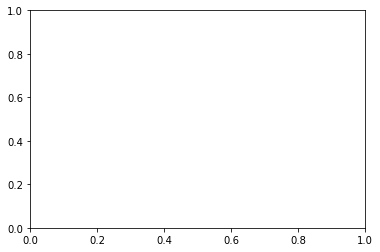

In [177]:
for line in logaO2:
    plt.plot(pH, line)
for line in pH_vert: 
    plt.axvline(line)

In [142]:
phases = rkt.Phases(db)

aqueous_phase = rkt.AqueousPhase(["H2O@", "O2@", "H2@", "H+", "OH-", 
                                  "H2S@", "HS-", "HSO4-", "SO4-2", 
                                  "NaCl@", "Na+", "Cl-", 
                                  "CoCl4-2", 
                                  "CuCl2-", 
                                  "FeCl2@"
                                  ])
phases.add(aqueous_phase)

mineral_phases = rkt.MineralPhases(["Linnaeite", "Cattierite", "Co-pentlandite", "CoO(s)", "Co3O4(s)", "Co(s)",
                                    "Bornite", "Chalcocite", "Chalcopyrite", "Cu", "Cuprite", 
                                    'Marcasite', 'Pyrite', 'Pyrrhotite', 'Troilite', 
                                    'Fe(OH)3', 'Goethite', 'Hematite', 'Magnetite', 'Tenorite', 'Wustite'
                                    ])
phases.add(mineral_phases)

gaseous_phase = rkt.GaseousPhase(["H2O(g)", "O2(g)", "H2(g)"])
phases.add(gaseous_phase)



system = rkt.ChemicalSystem(phases)


In [143]:
print([species.name() for species in system.species()])

['H2O@', 'O2@', 'H2@', 'H+', 'OH-', 'H2S@', 'HS-', 'HSO4-', 'SO4-2', 'NaCl@', 'Na+', 'Cl-', 'CoCl4-2', 'CuCl2-', 'FeCl2@', 'H2O(g)', 'O2(g)', 'H2(g)', 'Linnaeite', 'Cattierite', 'Co-pentlandite', 'CoO(s)', 'Co3O4(s)', 'Co(s)', 'Bornite', 'Chalcocite', 'Chalcopyrite', 'Cu', 'Cuprite', 'Marcasite', 'Pyrite', 'Pyrrhotite', 'Troilite', 'Fe(OH)3', 'Goethite', 'Hematite', 'Magnetite', 'Tenorite', 'Wustite']


In [145]:
equilibrater = ConstrainedEquilibration(system)

T = equilibrater.addConstraint(             "temperature", 150 + 273.15,                                "kelvin")
equilibrater.addConstraint(                 "pressure",    rkt.waterSaturatedPressureWagnerPruss(T)[0], "Pa");
fO2_values = equilibrater.addConstraint(    "fO2",         10**np.linspace(-20, -60, 50),               "bar");
pH_values = equilibrater.addConstraint(     "pH",          np.linspace(0, 12, 50));
equilibrater.addConstraint(                 "S",           0.001,                                       "molal");

equilibrater.initialize("H2O@",      1,   "kg")
equilibrater.initialize("NaCl@",     1,   "mol")
equilibrater.initialize("Co(s)",     1,   "mol")
equilibrater.initialize("Cu",        1,   "mol")
equilibrater.initialize("Magnetite", 1/3, "mol")

states = equilibrater.equilibrate()


In [89]:
states[35]

+-------------------+-------------+------+
| Property          |       Value | Unit |
+-------------------+-------------+------+
| Temperature       |      423.15 |    K |
| Pressure          |      476159 |   Pa |
| Element Amount:   |             |      |
| :: H              |     111.043 |  mol |
| :: O              |     56.5114 |  mol |
| :: Na             |           1 |  mol |
| :: S              |  0.00100024 |  mol |
| :: Cl             |           1 |  mol |
| :: Co             |           1 |  mol |
| Species Amount:   |             |      |
| :: H2O@           |     55.5216 |  mol |
| :: O2@            |       1e-16 |  mol |
| :: H2@            | 6.41852e-14 |  mol |
| :: H+             | 2.15494e-07 |  mol |
| :: OH-            | 1.05267e-05 |  mol |
| :: H2S@           |       1e-16 |  mol |
| :: HS-            |       1e-16 |  mol |
| :: HSO4-          |  1.1399e-06 |  mol |
| :: SO4-2          | 0.000999096 |  mol |
| :: NaCl@          |    0.263277 |  mol |
| :: Na+   

In [99]:
species = ["H2S@", "HS-", "HSO4-", "SO4-2"]
predom_species = []
for state in states: 
    predom_specie = species[0]
    for specie in species: 
        if state.speciesAmount(specie) > state.speciesAmount(predom_specie):
            predom_specie = specie
    predom_species.append(predom_specie)

In [100]:
color_hex = ["#41bbc5", "#6c3640", "#86ec5a", "#e41a72"] #blue, brown, green, red
color_dict = {"H2S@": color_hex[0], "HS-": color_hex[1], "HSO4-": color_hex[2], "SO4-2": color_hex[3]}
colors = [color_dict[specie] for specie in predom_species]

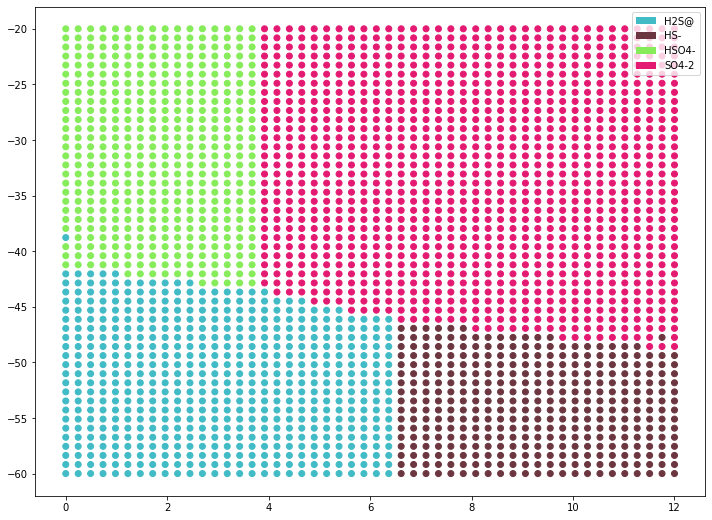

In [101]:
points_plot = np.meshgrid(pH_values, np.log10(fO2_values))

fig, ax = plt.subplots(figsize=(12,9))
scatter = ax.scatter(*zip(dim.flatten() for dim in points_plot), c=colors)

# add legend
recs = []
for i in range(len(color_hex)):
    recs.append(mpatches.Rectangle((0,0),1,1, fc=color_hex[i]))
ax.legend(recs, species, loc="upper right")

In [102]:
minerals = ["Linnaeite", "Cattierite", "Co-pentlandite", "CoO(s)", "Co3O4(s)", "Co(s)"]
stable_minerals = []
for state in states: 
    stable_mineral = minerals[0]
    for mineral in minerals: 
        if state.speciesAmount(mineral) > state.speciesAmount(stable_mineral):
            stable_mineral = mineral
    stable_minerals.append(stable_mineral)

In [103]:
color_hex = ["#68affc", "#7dac22", "#a82580", "#37e357", "#db77e6", "#1b511d"] #blue, brown, green, red
color_dict = {}
for i, mineral in enumerate(minerals): 
    color_dict[mineral] = color_hex[i]
colors = [color_dict[mineral] for mineral in stable_minerals]

In [104]:
color_dict

{'Linnaeite': '#68affc',
 'Cattierite': '#7dac22',
 'Co-pentlandite': '#a82580',
 'CoO(s)': '#37e357',
 'Co3O4(s)': '#db77e6',
 'Co(s)': '#1b511d'}

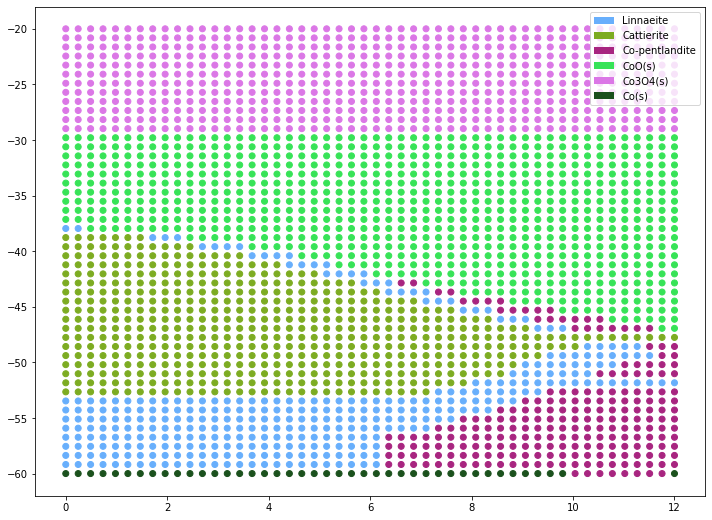

In [105]:
points_plot = np.meshgrid(pH_values, np.log10(fO2_values))

fig, ax = plt.subplots(figsize=(12,9))
scatter = ax.scatter(*zip(dim.flatten() for dim in points_plot), c=colors)

# add legend
recs = []
for i in range(len(color_hex)):
    recs.append(mpatches.Rectangle((0,0),1,1, fc=color_hex[i]))
ax.legend(recs, minerals, loc="upper right")